# Maratona DEV - Challenge 01
## Link: https://github.com/maratonadev/desafio-1-2021

## 1- Importando as bibliotecas

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,f_classif

sns.set()

## 2 - Carregando a base de dados

In [261]:
account = pd.read_csv('datasets/ACCOUNTS.csv')
account.head()

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


In [262]:
loans = pd.read_csv('datasets/loans.csv')
loans.head()

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [263]:
demo = pd.read_csv('datasets/DEMOGRAPHICS.csv')
demo.head()

,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0


In [264]:
answers = pd.read_csv('datasets/ANSWERS.csv')
answers.head()

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,...,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,...,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,TO_FILL
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,...,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,TO_FILL
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,...,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,TO_FILL
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,...,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,TO_FILL
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,...,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,TO_FILL


## 3 - Explorando os dados

In [265]:
print(f'O dataset account é formado por {account.shape[0]} linhas e {account.shape[1]} atributos')
print(f'O dataset loans é formado por {loans.shape[0]} linhas e {loans.shape[1]} atributos')
print(f'O dataset demographic é formado por {demo.shape[0]} linhas e {demo.shape[1]} atributos')
print(f'O dataset answers é formado por {answers.shape[0]} linhas e {answers.shape[1]} atributos')

O dataset account é formado por 2477 linhas e 5 atributos
O dataset loans é formado por 3999 linhas e 8 atributos
O dataset demographic é formado por 3936 linhas e 11 atributos
O dataset answers é formado por 1000 linhas e 22 atributos


In [266]:
print(account.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2477 non-null   int64  
 1   CHECKING_BALANCE        2467 non-null   object 
 2   CREDIT_HISTORY          2462 non-null   object 
 3   EXISTING_SAVINGS        2467 non-null   object 
 4   EXISTING_CREDITS_COUNT  2463 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.9+ KB
None


In [267]:
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3999 non-null   int64  
 1   PAYMENT_TERM         3975 non-null   float64
 2   INSTALLMENT_PLANS    3978 non-null   object 
 3   INSTALLMENT_PERCENT  3974 non-null   float64
 4   LOAN_PURPOSE         3979 non-null   object 
 5   LOAN_AMOUNT          3981 non-null   float64
 6   OTHERS_ON_LOAN       3977 non-null   object 
 7   ALLOW                3999 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 250.1+ KB
None


In [268]:
print(demo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3936 non-null   int64  
 1   SEX                         3920 non-null   object 
 2   AGE                         3918 non-null   float64
 3   JOB_TYPE                    3910 non-null   float64
 4   DEPENDENTS                  3915 non-null   float64
 5   TELEPHONE                   3915 non-null   float64
 6   FOREIGN_WORKER              3909 non-null   float64
 7   EMPLOYMENT_DURATION         3923 non-null   float64
 8   PROPERTY                    3918 non-null   object 
 9   HOUSING                     3912 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  3917 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 338.4+ KB
None


In [269]:
print(f'O número de IDs únicos no dataset account é: {account.ID.nunique()}')
print(f'O número de IDs únicos no dataset account é: {loans.ID.nunique()}')
print(f'O número de IDs únicos no dataset account é: {demo.ID.nunique()}')

O número de IDs únicos no dataset account é: 2477
O número de IDs únicos no dataset account é: 3999
O número de IDs únicos no dataset account é: 3936


In [270]:
# Eliminando as linhas que possuem dados nulos
account.dropna(inplace=True)
loans.dropna(inplace=True)
demo.dropna(inplace=True)

print(f'O número de IDs únicos no dataset account é: {account.ID.nunique()}')
print(f'O número de IDs únicos no dataset account é: {loans.ID.nunique()}')
print(f'O número de IDs únicos no dataset account é: {demo.ID.nunique()}')

O número de IDs únicos no dataset account é: 2428
O número de IDs únicos no dataset account é: 3870
O número de IDs únicos no dataset account é: 3736


In [271]:
# Procurando saber se há dados duplicados

print(f'A quantidade de linhas duplicadas no dataframe account é: {account.duplicated().sum()}')
print(f'A quantidade de linhas duplicadas no dataframe account é: {loans.duplicated().sum()}')
print(f'A quantidade de linhas duplicadas no dataframe account é: {demo.duplicated().sum()}')

A quantidade de linhas duplicadas no dataframe account é: 0
A quantidade de linhas duplicadas no dataframe account é: 0
A quantidade de linhas duplicadas no dataframe account é: 0


In [272]:
# Realizando o merge dos dataframe
df = account.merge(demo, how='inner', on='ID')
df = df.merge(loans, how='inner', on='ID')
df.head(10)

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,...,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0,F,24.0,3.0,1.0,1.0,...,SAVINGS_INSURANCE,OWN,2.0,310.0,NONE,2.0,CAR_NEW,3503.0,NONE,1
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0,F,30.0,3.0,1.0,0.0,...,CAR_OTHER,RENT,1.0,630.0,STORES,3.0,CAR_NEW,3729.0,NONE,1
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0,M,40.0,3.0,1.0,0.0,...,UNKNOWN,OWN,4.0,868.0,NONE,3.0,CAR_USED,8516.0,NONE,0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0,M,28.0,1.0,1.0,0.0,...,CAR_OTHER,OWN,3.0,403.0,BANK,3.0,FURNITURE,2577.0,NONE,1
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0,M,19.0,2.0,1.0,0.0,...,REAL_ESTATE,OWN,3.0,810.0,NONE,4.0,BUSINESS,3750.0,NONE,1
5,1096578,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,421.96,1.0,F,43.0,2.0,1.0,0.0,...,CAR_OTHER,OWN,4.0,806.0,NONE,3.0,RADIO_TV,5299.0,NONE,0
6,544178,-121.7,CREDITS_PAID_TO_DATE,22.44,1.0,M,26.0,3.0,1.0,0.0,...,SAVINGS_INSURANCE,RENT,3.0,480.0,NONE,2.0,FURNITURE,250.0,NONE,1
7,356107,-124.51,ALL_CREDITS_PAID_BACK,35.07,1.0,F,20.0,3.0,1.0,0.0,...,SAVINGS_INSURANCE,OWN,1.0,360.0,STORES,1.0,CAR_USED,250.0,NONE,1
8,72646,-1911.77,CREDITS_PAID_TO_DATE,56.22,1.0,M,33.0,3.0,1.0,0.0,...,SAVINGS_INSURANCE,OWN,1.0,300.0,STORES,2.0,CAR_USED,652.0,NONE,1
9,1136574,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,383.57,1.0,M,43.0,2.0,1.0,0.0,...,SAVINGS_INSURANCE,OWN,3.0,806.0,NONE,4.0,CAR_USED,4274.0,NONE,0


In [273]:
df.dtypes

ID                              int64
CHECKING_BALANCE               object
CREDIT_HISTORY                 object
EXISTING_SAVINGS               object
EXISTING_CREDITS_COUNT        float64
SEX                            object
AGE                           float64
JOB_TYPE                      float64
DEPENDENTS                    float64
TELEPHONE                     float64
FOREIGN_WORKER                float64
EMPLOYMENT_DURATION           float64
PROPERTY                       object
HOUSING                        object
CURRENT_RESIDENCE_DURATION    float64
PAYMENT_TERM                  float64
INSTALLMENT_PLANS              object
INSTALLMENT_PERCENT           float64
LOAN_PURPOSE                   object
LOAN_AMOUNT                   float64
OTHERS_ON_LOAN                 object
ALLOW                           int64
dtype: object

In [283]:
df['ID'] = df['ID'].astype('object').dtypes
df['CHECKING_BALANCE'].replace('NO_CHECKING', np.nan, inplace=True)
df['EXISTING_SAVINGS'].replace('UNKNOWN', np.nan, inplace=True)

df['CHECKING_BALANCE'] = df['CHECKING_BALANCE'].astype('float')
df['EXISTING_SAVINGS'] = df['EXISTING_SAVINGS'].astype('float')
df.dtypes

ID                             object
CHECKING_BALANCE              float64
CREDIT_HISTORY                 object
EXISTING_SAVINGS              float64
EXISTING_CREDITS_COUNT        float64
SEX                            object
AGE                           float64
JOB_TYPE                      float64
DEPENDENTS                    float64
TELEPHONE                     float64
FOREIGN_WORKER                float64
EMPLOYMENT_DURATION           float64
PROPERTY                       object
HOUSING                        object
CURRENT_RESIDENCE_DURATION    float64
PAYMENT_TERM                  float64
INSTALLMENT_PLANS              object
INSTALLMENT_PERCENT           float64
LOAN_PURPOSE                   object
LOAN_AMOUNT                   float64
OTHERS_ON_LOAN                 object
ALLOW                           int64
dtype: object

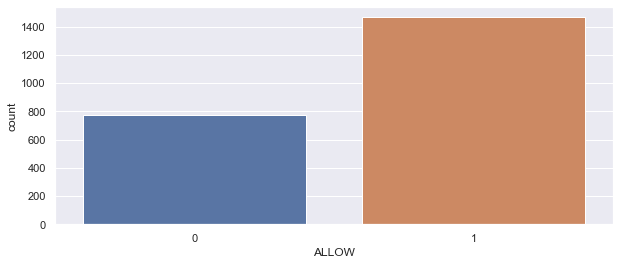

In [275]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='ALLOW', data=df, ax=ax)
plt.show()

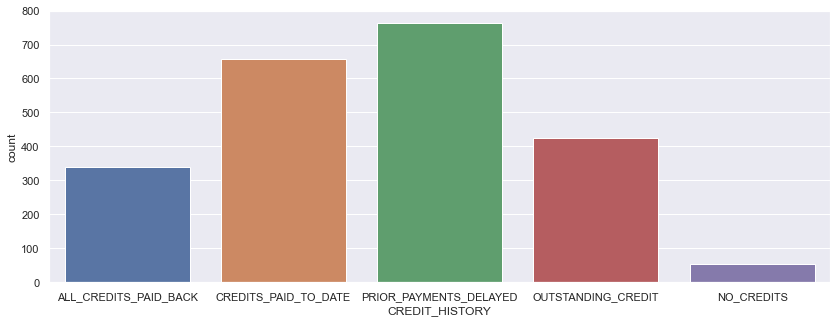

In [17]:
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(x='CREDIT_HISTORY', data=df, ax=ax)
plt.show()

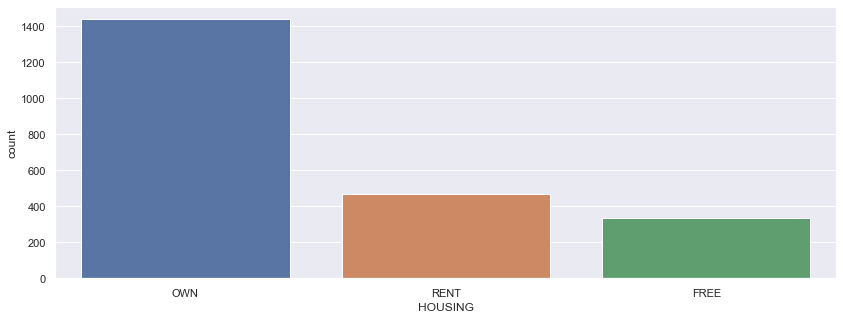

In [18]:
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(x='HOUSING', data=df, ax=ax)
plt.show()

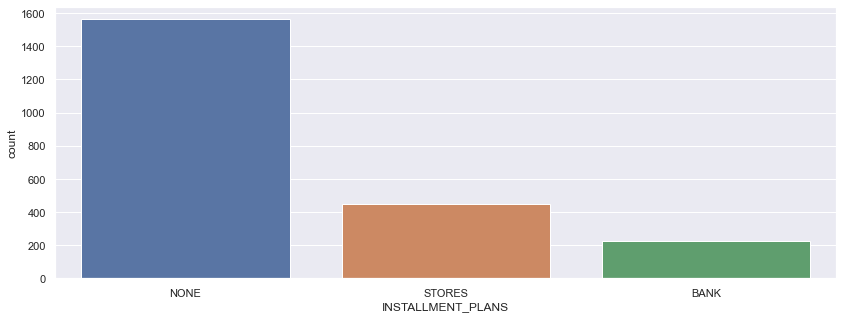

In [19]:
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(x='INSTALLMENT_PLANS', data=df, ax=ax)
plt.show()

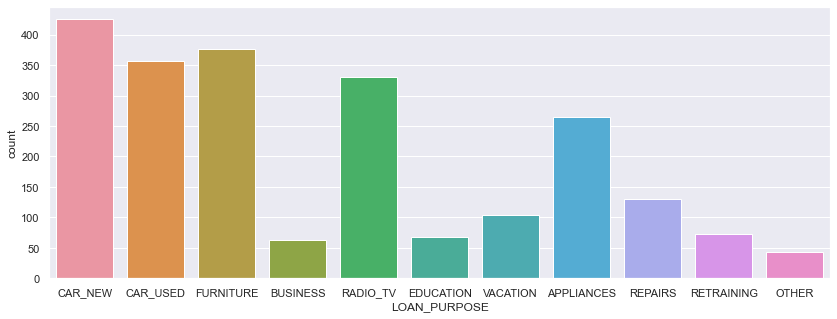

In [20]:
fig, ax = plt.subplots(figsize=(14,5))
sns.countplot(x='LOAN_PURPOSE', data=df, ax=ax)
plt.show()

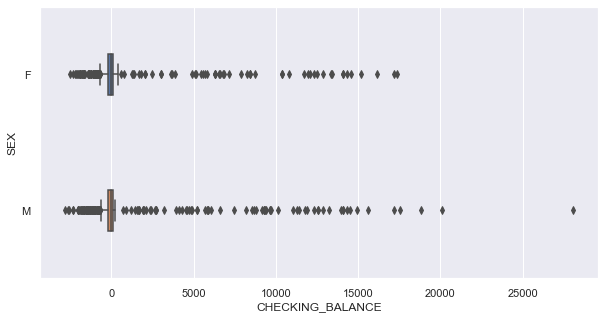

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='CHECKING_BALANCE', y='SEX', data=df, ax=ax, width=0.3)
plt.show()

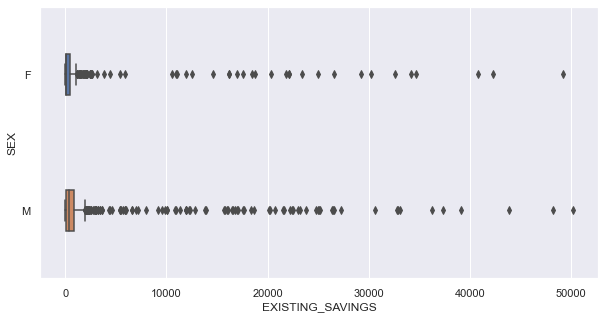

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='EXISTING_SAVINGS', y='SEX', data=df, ax=ax, width=0.3)
plt.show()

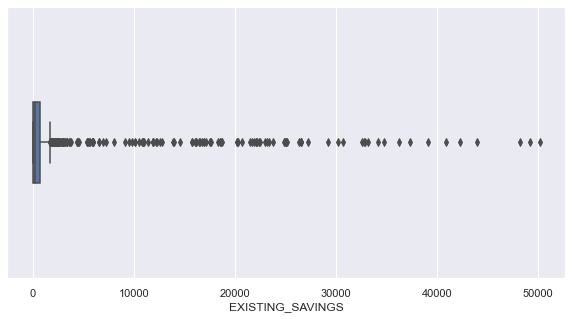

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='EXISTING_SAVINGS', data=df, ax=ax, width=0.3)
plt.show()

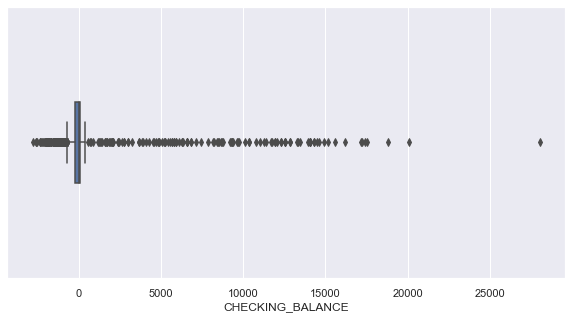

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='CHECKING_BALANCE', data=df, ax=ax, width=0.3)
plt.show()

As colunas CHECKING_BALANCE e EXISTING_SAVINGS possuem valores desconhecidos que eu tratei como nulo, para descobrir qual a melhor estratégia, farei 4 dataframe diferentes, 1 deles eliminarei todos os dados nulos, no outro preencherei os dados nulos com o valor 0, eliminar a coluna e preencher a coluna com a média dos dados.

In [25]:
df_dropna = df.copy()
df_dropna = df.dropna()

df_fill0 = df.copy()
df_fill0 = df.fillna(0)

df_fillMean = df.copy()
df_fillMean['CHECKING_BALANCE'] = df_fillMean['CHECKING_BALANCE'].fillna(df_fillMean['CHECKING_BALANCE'].mean())
df_fillMean['EXISTING_SAVINGS'] = df_fillMean['EXISTING_SAVINGS'].fillna(df_fillMean['EXISTING_SAVINGS'].mean())

df_dropColumns = df.copy()
df_dropColumns.drop(['CHECKING_BALANCE', 'EXISTING_SAVINGS'], axis=1, inplace=True)

## 4 - Criando os primeiros modelos

In [340]:
categorical_columns = ['SEX', 'CREDIT_HISTORY', 'PROPERTY', 'HOUSING', 
                       'INSTALLMENT_PLANS', 'LOAN_PURPOSE', 'OTHERS_ON_LOAN']

numeric_column = ['AGE', 'LOAN_AMOUNT', 'PAYMENT_TERM']

columns_to_inpute = ['CHECKING_BALANCE', 'EXISTING_SAVINGS']

target = ['ALLOW']

In [334]:
X = df.drop(['ID', 'ALLOW'], axis=1)
y = df[target].copy()

X_dropna = df_dropna.drop(['ID', 'ALLOW'], axis=1)
y_dropna = df_dropna[target].copy()

X_fill0 = df_fill0.drop(['ID', 'ALLOW'], axis=1)
y_fill0 = df_fill0[target].copy()

X_fillMean = df_fillMean.drop(['ID', 'ALLOW'], axis=1)
y_fillMean = df_fillMean[target].copy()

X_dropColumns = df_dropColumns.drop(['ID', 'ALLOW'], axis=1)
y_dropColumns = df_dropColumns[target].copy()

In [28]:
onehotencoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehotencoder.fit_transform(X_dropna[categorical_columns]).shape
#onehotencoder.transform(X_dropna[categorical_columns])

(1321, 31)

### 4.1 - Criando um modelo dummy

#### 4.11 - Modelo dummy com estratégia most_frequent

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_fill0, y_fill0, test_size=0.3, random_state=42)

clf_most_frequent = DummyClassifier(strategy='most_frequent')
clf_most_frequent.fit(X_train, y_train)
y_pred = clf_most_frequent.predict(X_test)
score_most_frequent = f1_score(y_test, y_pred)
print(f'O score f1 do modelo dummy most frequent é {score_most_frequent}')

O score f1 do modelo dummy most frequent é 0.7748404740200546


#### 4.12 - Modelo dummy com estratégia stratified

In [30]:
clf_stratified = DummyClassifier(strategy='stratified')
clf_stratified.fit(X_train, y_train)
y_pred = clf_stratified.predict(X_test)
score_stratified = f1_score(y_test, y_pred)
print(f'O score f1 do modelo dummy most frequent é {score_stratified}')

O score f1 do modelo dummy most frequent é 0.6492027334851935


### 4.2 - Avaliando qual a melhor estratégia

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_dropna, y_dropna, test_size=0.3, random_state=42)

ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                       remainder='passthrough')
pipeline = Pipeline([('encoder', ct), ('clf', DecisionTreeClassifier())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score_decisionTree = f1_score(y_test, y_pred)
print(f'O score f1 do modelo dummy most frequent é {score_decisionTree}')

O score f1 do modelo dummy most frequent é 0.8492307692307692


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_fill0, y_fill0, test_size=0.3, random_state=42)

ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                       remainder='passthrough')
pipeline = Pipeline([('encoder', ct), ('clf', DecisionTreeClassifier())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score_decisionTree = f1_score(y_test, y_pred)
print(f'O score f1 do modelo dummy most frequent é {score_decisionTree}')

O score f1 do modelo dummy most frequent é 0.7782909930715936


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_fillMean, y_fillMean, test_size=0.3, random_state=42)

ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                       remainder='passthrough')
pipeline = Pipeline([('encoder', ct), ('clf', DecisionTreeClassifier())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score_decisionTree = f1_score(y_test, y_pred)
print(f'O score f1 do modelo dummy most frequent é {score_decisionTree}')

O score f1 do modelo dummy most frequent é 0.7522935779816514


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_dropColumns, y_dropColumns, test_size=0.3, random_state=42)

ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                       remainder='passthrough')
pipeline = Pipeline([('encoder', ct), ('clf', DecisionTreeClassifier())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
score_decisionTree = f1_score(y_test, y_pred)
print(f'O score f1 do modelo dummy most frequent é {score_decisionTree}')

O score f1 do modelo dummy most frequent é 0.7607223476297968


### 4.2 - Modelo GradientBoostingClassifier - Usando de parametro para ver qual estratégia é melhor

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_dropna, y_dropna, test_size=0.3, random_state=42)

ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                       remainder='passthrough')
pipeline = Pipeline([('encoder', ct), ('clf', GradientBoostingClassifier())])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
score_decisionTree = f1_score(y_test, y_pred)
print(f'O score f1 do modelo é {score_decisionTree}')

O score f1 do modelo é 0.8833819241982508


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_fill0, y_fill0, test_size=0.3, random_state=42)

ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                       remainder='passthrough')
pipeline = Pipeline([('encoder', ct), ('clf', GradientBoostingClassifier())])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
score_decisionTree = f1_score(y_test, y_pred)
print(f'O score f1 do modelo é: {score_decisionTree}')

O score f1 do modelo é: 0.8275109170305677


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_fillMean, y_fillMean, test_size=0.3, random_state=42)

ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                       remainder='passthrough')
pipeline = Pipeline([('encoder', ct), ('clf', GradientBoostingClassifier())])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
score_decisionTree = f1_score(y_test, y_pred)
print(f'O score f1 do modelo é: {score_decisionTree}')

O score f1 do modelo é: 0.8327868852459016


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_dropColumns, y_dropColumns, test_size=0.3, random_state=42)

ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                       remainder='passthrough')
pipeline = Pipeline([('encoder', ct), ('clf', GradientBoostingClassifier())])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
score_decisionTree = f1_score(y_test, y_pred)
print(f'O score f1 do modelo é: {score_decisionTree}')

O score f1 do modelo é: 0.8295331161780674


Em ambos os modelos a melhor estratégia é **eliminando** as linhas com valores nulos, assim a partir de agora todos os modelos serão treinados utilizando essa estratégia.

In [39]:
def avaliando_modelos(modelo, X=X_dropna, y=y_dropna, X1=X_fill0, y1=y_fill0, X2=X_fillMean, y2=y_fillMean, 
                      X3=X_dropColumns, y3=y_dropColumns):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                           remainder='passthrough')
    pipeline = Pipeline([('encoder', ct), ('clf', modelo)])
    pipeline.fit(X_train, y_train.values.ravel())
    y_pred = pipeline.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'O score f1 do modelo com a estratégia dropna é: {score}')
    
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

    pipeline = Pipeline([('encoder', ct), ('clf', modelo)])
    pipeline.fit(X_train, y_train.values.ravel())
    y_pred = pipeline.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'O score f1 do modelo a estratégia fill0 é: {score}')
    
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

    pipeline = Pipeline([('encoder', ct), ('clf', modelo)])
    pipeline.fit(X_train, y_train.values.ravel())
    y_pred = pipeline.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'O score f1 do modelo a estratégia fillmean é: {score}')
    
    X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

    pipeline = Pipeline([('encoder', ct), ('clf', modelo)])
    pipeline.fit(X_train, y_train.values.ravel())
    y_pred = pipeline.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'O score f1 do modelo a estratégia dropcolumns é: {score}')

### 4.3 - Avaliando qual o melhor modelo

#### 4.3.1 - DecisionTreeClassifier

In [40]:
avaliando_modelos(DecisionTreeClassifier())

O score f1 do modelo com a estratégia dropna é: 0.8393135725429018
O score f1 do modelo a estratégia fill0 é: 0.7630057803468209
O score f1 do modelo a estratégia fillmean é: 0.7545871559633027
O score f1 do modelo a estratégia dropcolumns é: 0.7603121516164996


#### 4.3.2 - GradientBoostingClassifier

In [41]:
avaliando_modelos(GradientBoostingClassifier())

O score f1 do modelo com a estratégia dropna é: 0.8833819241982508
O score f1 do modelo a estratégia fill0 é: 0.826608505997819
O score f1 do modelo a estratégia fillmean é: 0.8327868852459016
O score f1 do modelo a estratégia dropcolumns é: 0.8295331161780674


#### 4.3.3 - AdaBoostClassifier

In [42]:
avaliando_modelos(AdaBoostClassifier())

O score f1 do modelo com a estratégia dropna é: 0.8777614138438881
O score f1 do modelo a estratégia fill0 é: 0.8248337028824834
O score f1 do modelo a estratégia fillmean é: 0.8265193370165745
O score f1 do modelo a estratégia dropcolumns é: 0.8235294117647058


#### 4.3.4 - ExtraTreesClassifier

In [43]:
avaliando_modelos(ExtraTreesClassifier())

O score f1 do modelo com a estratégia dropna é: 0.8892086330935252
O score f1 do modelo a estratégia fill0 é: 0.8379272326350606
O score f1 do modelo a estratégia fillmean é: 0.8245810055865922
O score f1 do modelo a estratégia dropcolumns é: 0.8357221609702316


#### 4.3.5 - RandomForestClassifier

In [44]:
avaliando_modelos(RandomForestClassifier())

O score f1 do modelo com a estratégia dropna é: 0.9015691868758916
O score f1 do modelo a estratégia fill0 é: 0.8356909684439608
O score f1 do modelo a estratégia fillmean é: 0.8415300546448088
O score f1 do modelo a estratégia dropcolumns é: 0.8293216630196936


#### 4.3.6 - LogisticRegression

In [45]:
avaliando_modelos(LogisticRegression(max_iter=3000))

O score f1 do modelo com a estratégia dropna é: 0.9037900874635568
O score f1 do modelo a estratégia fill0 é: 0.8298109010011124
O score f1 do modelo a estratégia fillmean é: 0.8416389811738649
O score f1 do modelo a estratégia dropcolumns é: 0.832035595105673


### 4.4 - Avaliando os modelos com standardScaler

In [69]:
def avaliando_modelos(modelo, X=X_dropna, y=y_dropna):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                           remainder='passthrough')

    pipeline = Pipeline([('encoder', ct), ('clf', modelo)])
    pipeline.fit(X_train, y_train.values.ravel())
    y_pred = pipeline.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'O score f1 do modelo sem StandardScaler é : {score}')

    ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
                            ('scaler', StandardScaler(), numeric_column)], 
                           remainder='passthrough')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    pipeline = Pipeline([('encoder', ct), ('clf', modelo)])
    pipeline.fit(X_train, y_train.values.ravel())
    y_pred = pipeline.predict(X_test)
    score = f1_score(y_test, y_pred)
    print(f'O score f1 do modelo com StandardScaler é: {score}')

#### 4.4.1 - DecisionTreeClassifier

In [70]:
avaliando_modelos(DecisionTreeClassifier())

O score f1 do modelo sem StandardScaler é : 0.8460342146189735
O score f1 do modelo com StandardScaler é: 0.8473520249221184


#### 4.4.2 - GradientBoostingClassifier

In [71]:
avaliando_modelos(GradientBoostingClassifier())

O score f1 do modelo sem StandardScaler é : 0.8862973760932945
O score f1 do modelo com StandardScaler é: 0.8850072780203785


#### 4.4.3 - AdaBoostClassifier

In [72]:
avaliando_modelos(AdaBoostClassifier())

O score f1 do modelo sem StandardScaler é : 0.8777614138438881
O score f1 do modelo com StandardScaler é: 0.8777614138438881


#### 4.4.4 - ExtraTreesClassifier

In [73]:
avaliando_modelos(ExtraTreesClassifier())

O score f1 do modelo sem StandardScaler é : 0.8949640287769783
O score f1 do modelo com StandardScaler é: 0.8904899135446684


#### 4.4.5 - RandomForestClassifier

In [74]:
avaliando_modelos(RandomForestClassifier())

O score f1 do modelo sem StandardScaler é : 0.9
O score f1 do modelo com StandardScaler é: 0.8971428571428571


#### 4.4.6 - LogisticRegression

In [75]:
avaliando_modelos(LogisticRegression(max_iter=3000))

O score f1 do modelo sem StandardScaler é : 0.9037900874635568
O score f1 do modelo com StandardScaler é: 0.9024745269286754


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_dropna, y_dropna, test_size=0.3, random_state=42)
    
ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)], 
                       remainder='passthrough')

pipeline = Pipeline([('encoder', ct), 
                     ('selectFeatures', SelectKBest(score_func=f_classif,k=8)),
                     ('clf', LogisticRegression(max_iter=3000))])

pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
score = f1_score(y_test, y_pred)
print(f'O score f1 do modelo sem StandardScaler é : {score}')

O score f1 do modelo sem StandardScaler é : 0.9020172910662824


### 4.5 - Tunando os hiper parametros

In [279]:
df.head()

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,...,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,object,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0,F,24.0,3.0,1.0,1.0,...,SAVINGS_INSURANCE,OWN,2.0,310.0,NONE,2.0,CAR_NEW,3503.0,NONE,1
1,object,-1673.16,CREDITS_PAID_TO_DATE,22.90,1.0,F,30.0,3.0,1.0,0.0,...,CAR_OTHER,RENT,1.0,630.0,STORES,3.0,CAR_NEW,3729.0,NONE,1
2,object,NaN,CREDITS_PAID_TO_DATE,450.35,2.0,M,40.0,3.0,1.0,0.0,...,UNKNOWN,OWN,4.0,868.0,NONE,3.0,CAR_USED,8516.0,NONE,0
3,object,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0,M,28.0,1.0,1.0,0.0,...,CAR_OTHER,OWN,3.0,403.0,BANK,3.0,FURNITURE,2577.0,NONE,1
4,object,NaN,CREDITS_PAID_TO_DATE,295.03,1.0,M,19.0,2.0,1.0,0.0,...,REAL_ESTATE,OWN,3.0,810.0,NONE,4.0,BUSINESS,3750.0,NONE,1


In [303]:
ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
                        ('impute', SimpleImputer(), columns_to_inpute),
                        ('scaler', StandardScaler(), numeric_column)], 
                       remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline = Pipeline([('encoder', ct), ('clf', LogisticRegression(max_iter=3000))])
pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
score = f1_score(y_test, y_pred)
print(f'O score f1 do modelo com StandardScaler é: {score}')

O score f1 do modelo com StandardScaler é: 0.9037900874635568


In [304]:
pipeline

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categories',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SEX', 'CREDIT_HISTORY',
                                                   'PROPERTY', 'HOUSING',
                                                   'INSTALLMENT_PLANS',
                                                   'LOAN_PURPOSE',
                                                   'OTHERS_ON_LOAN']),
                                                 ('impute', SimpleImputer(),
                                                  ['CHECKING_BALANCE',
                                                   'EXISTING_SAVINGS']),
                                                 ('scaler', StandardScaler(),
                                                  ['CHECKING_BALANCE',
                                                   'EXISTING_SAVINGS', 'AGE',
                                                   'LOAN_AMOUNT',
                                                   'PAYMENT_TERM'])])),
                ('clf', LogisticRegression(max_iter=3000))])

In [333]:
df

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,...,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,object,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0,F,24.0,3.0,1.0,1.0,...,SAVINGS_INSURANCE,OWN,2.0,310.0,NONE,2.0,CAR_NEW,3503.0,NONE,1
1,object,-1673.16,CREDITS_PAID_TO_DATE,22.90,1.0,F,30.0,3.0,1.0,0.0,...,CAR_OTHER,RENT,1.0,630.0,STORES,3.0,CAR_NEW,3729.0,NONE,1
2,object,NaN,CREDITS_PAID_TO_DATE,450.35,2.0,M,40.0,3.0,1.0,0.0,...,UNKNOWN,OWN,4.0,868.0,NONE,3.0,CAR_USED,8516.0,NONE,0
3,object,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0,M,28.0,1.0,1.0,0.0,...,CAR_OTHER,OWN,3.0,403.0,BANK,3.0,FURNITURE,2577.0,NONE,1
4,object,NaN,CREDITS_PAID_TO_DATE,295.03,1.0,M,19.0,2.0,1.0,0.0,...,REAL_ESTATE,OWN,3.0,810.0,NONE,4.0,BUSINESS,3750.0,NONE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,object,163.82,CREDITS_PAID_TO_DATE,472.11,1.0,F,41.0,0.0,1.0,0.0,...,CAR_OTHER,OWN,3.0,450.0,BANK,3.0,CAR_NEW,3007.0,CO-APPLICANT,0
2233,object,14324.23,PRIOR_PAYMENTS_DELAYED,18652.44,1.0,M,46.0,3.0,1.0,1.0,...,SAVINGS_INSURANCE,OWN,3.0,510.0,NONE,4.0,VACATION,4191.0,GUARANTOR,1
2234,object,130.13,PRIOR_PAYMENTS_DELAYED,726.78,2.0,M,28.0,3.0,1.0,1.0,...,CAR_OTHER,RENT,1.0,124.0,STORES,1.0,FURNITURE,250.0,NONE,1
2235,object,NaN,PRIOR_PAYMENTS_DELAYED,NaN,1.0,M,46.0,0.0,1.0,0.0,...,CAR_OTHER,RENT,3.0,961.0,BANK,3.0,BUSINESS,5172.0,NONE,1


#### 4.5.1 - LogisticRegression

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_dropna, y_dropna, test_size=0.3, random_state=42)

In [365]:
param = {'clf__solver': ['liblinear', 'sag', 'saga'],
         'selectFeatures__k': np.arange(10, 30, 3),
         'ct__impute_columns__impute__strategy': ['mean', 'median']}

In [366]:
cat_transformer = Pipeline(steps=[('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

impute_columns = Pipeline(steps=[('impute', SimpleImputer()),
                                 ('scaler', StandardScaler())])

ct = ColumnTransformer([('categories', cat_transformer, categorical_columns),
                        ('impute_columns', impute_columns, columns_to_inpute),
                        ('scaler', StandardScaler(), numeric_column)], 
                       remainder='passthrough')

pipeline = Pipeline([('ct', ct), 
                     ('selectFeatures', SelectKBest(score_func=f_classif)),
                     ('clf', LogisticRegression(max_iter=3000))])

search = GridSearchCV(pipeline, param, cv=5, n_jobs=-1)
search.fit(X, y)
print(search.best_score_)
print(search.best_params_)

0.7849692393736017
{'clf__solver': 'liblinear', 'ct__impute_columns__impute__strategy': 'mean', 'selectFeatures__k': 13}


E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 4.5.2 - RandomForestClassifier

In [361]:
param = {'clf__n_estimators': np.arange(50, 100, 1),
         'clf__criterion': ['gini', 'entropy'],
         'clf__min_samples_split': np.arange(2, 150, 1),
         'clf__min_samples_leaf': np.arange(1, 150, 1),
         'selectFeatures__k': np.arange(5, 30, 1),
         'ct__impute__strategy': ['mean', 'median']
         }


In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
                        ('impute', SimpleImputer(), columns_to_inpute)], 
                       remainder='passthrough')

pipeline = Pipeline([('ct', ct), 
                     ('selectFeatures', SelectKBest(score_func=f_classif)),
                     ('clf', RandomForestClassifier(n_jobs=-1))])

search = RandomizedSearchCV(pipeline, param, cv=5, n_jobs=-1, scoring='f1', n_iter=1000)
search.fit(X, y.values.ravel())
print(search.best_score_)
print(search.best_params_)

0.849043689442006
{'selectFeatures__k': 28, 'ct__impute__strategy': 'median', 'clf__n_estimators': 90, 'clf__min_samples_split': 118, 'clf__min_samples_leaf': 32, 'clf__criterion': 'gini'}


#### 4.5.3 - GradientBoostingClassifier

In [363]:
param = {'clf__loss': ['deviance', 'exponential'],
         'clf__learning_rate': np.arange(0.001, 0.2, 0.01),
         'clf__n_estimators': np.arange(50, 100, 10),
         'clf__criterion': ['friedman_mse', 'squared_error'],
         'clf__min_samples_split': np.arange(2, 150, 2),
         'clf__min_samples_leaf': np.arange(1, 100, 1),
         'selectFeatures__k': np.arange(5, 30, 1),
         'clf__tol': np.arange(1e-5, 1e-3, 1e-4),
         'ct__impute__strategy': ['mean', 'median']
         }

In [364]:
ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
                        ('impute', SimpleImputer(), columns_to_inpute)], 
                       remainder='passthrough')

pipeline = Pipeline([('ct', ct), 
                     ('selectFeatures', SelectKBest(score_func=f_classif)),
                     ('clf', GradientBoostingClassifier())])

search = RandomizedSearchCV(pipeline, param, cv=5, n_jobs=-1, scoring='f1', n_iter=2000)
search.fit(X, y.values.ravel())
print(search.best_score_)
print(search.best_params_)

0.8506944317838248
{'selectFeatures__k': 23, 'ct__impute__strategy': 'mean', 'clf__tol': 0.00041000000000000005, 'clf__n_estimators': 90, 'clf__min_samples_split': 100, 'clf__min_samples_leaf': 94, 'clf__loss': 'exponential', 'clf__learning_rate': 0.020999999999999998, 'clf__criterion': 'squared_error'}


In [ ]:
melhor_modelo = search.best_estimator_
search.best_estimator_

### 5 - Ultimo teste com o melhor modelo

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ct = ColumnTransformer([('categories', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
                        ('impute', SimpleImputer(strategy='mean'), columns_to_inpute)], 
                       remainder='passthrough')

pipeline = Pipeline([('ct', ct), 
                     ('selectFeatures', SelectKBest(score_func=f_classif, k=20)),
                     ('clf', GradientBoostingClassifier(tol=0.00041, n_estimators=100, min_samples_split=100,
                                                        min_samples_leaf=94, loss='exponential', 
                                                        criterion='squared_error'))])


pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)
score = f1_score(y_test, y_pred)
print(f'O score f1 do modelo sem StandardScaler é : {score}')

O score f1 do modelo sem StandardScaler é : 0.8298572996706916


### 6 - Predizendo os dados do dataframe answer

In [383]:
answers.head()

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,...,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,...,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,TO_FILL
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,...,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,TO_FILL
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,...,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,TO_FILL
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,...,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,TO_FILL
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,...,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,TO_FILL


In [384]:
answers_df = answers.drop('ID', axis=1).copy()
answers_df['CHECKING_BALANCE'].replace('NO_CHECKING', np.nan, inplace=True)
answers_df['EXISTING_SAVINGS'].replace('UNKNOWN', np.nan, inplace=True)

answers_df['CHECKING_BALANCE'] = answers_df['CHECKING_BALANCE'].astype('float')
answers_df['EXISTING_SAVINGS'] = answers_df['EXISTING_SAVINGS'].astype('float')
answers['ALLOW'] = pipeline.predict(answers_df)
answers.head()

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,...,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,...,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,1
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,...,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,1
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,...,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,1
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,...,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,1
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,...,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,1


In [387]:
df['ALLOW'].value_counts(normalize=True)

1    0.655342
0    0.344658
Name: ALLOW, dtype: float64

In [386]:
answers['ALLOW'].value_counts(normalize=True)

1    0.735
0    0.265
Name: ALLOW, dtype: float64

In [389]:
answers.to_csv('datasets/answers_done.csv', index=False)

In [390]:
df_teste = pd.read_csv('datasets/answers_done.csv')
df_teste.head()

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,...,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,...,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,1
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,...,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,1
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,...,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,1
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,...,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,1
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,...,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,1
